In [1018]:
#import libraries
import pandas as pd
import requests
import os
import tweepy
import json
from bs4 import BeautifulSoup
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from wordcloud import  WordCloud,STOPWORDS
import IPython.display as Disp

## Data gathering 

#### image-predictions.tsv

In [1019]:
#Url for image prediction i.e. what breed of dog .tsv file
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [1020]:
#folder to place image-preditions.tsv
folder_name='image_predictions'

In [1021]:
#Verify that folder exist in directory 
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [1022]:
# Get request response from Url
response = requests.get(url)

In [1023]:
response.status_code

200

In [1024]:
with open(os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
        file.write(response.content)

#### twitter-archive-enhanced.csv

In [1025]:
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [1026]:
df_twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [1027]:
df_image_predict = pd.read_csv('image_predictions/image-predictions.tsv',sep='\t')

In [1028]:
df_image_predict.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


#### tweet_json.txt(Twitter API)

In [1029]:
consumer_key = ''
consumer_secret=''
access_token=''
access_secret=''

In [1030]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)

In [1031]:
auth.set_access_token(access_token,access_secret)

In [1032]:
api = tweepy.API(auth)

In [1033]:
tweet = api.get_status(666020888022790149,tweet_mode='exended')
print(tweet._json)

{'created_at': 'Sun Nov 15 22:32:08 +0000 2015', 'id': 666020888022790149, 'id_str': '666020888022790149', 'text': 'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666020881337073664, 'id_str': '666020881337073664', 'indices': [108, 131], 'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', 'url': 'https://t.co/BLDqew2Ijj', 'display_url': 'pic.twitter.com/BLDqew2Ijj', 'expanded_url': 'https://twitter.com/dog_rates/status/666020888022790149/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 960, 'h': 720, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 960, 'h': 720, 'resize': 'fit'}, 'small': {'w': 680, 'h': 510, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [{'id': 66

In [1034]:
tweets_ids = df_twitter_archive.tweet_id.values

In [1035]:
tweets={}

In [1036]:
for ids in tweets_ids:
    try:
        tweet = api.get_status(ids,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
        tweets[str(ids)] = tweet._json
    except:
        print('Error for: ' + str(ids))

"for ids in tweets_ids:\n    try:\n        tweet = api.get_status(ids,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)\n        tweets[str(ids)] = tweet._json\n    except:\n        print('Error for: ' + str(ids))"

In [1037]:
with open('tweet_json.txt','w') as json_file:
        json.dump(tweets,json_file)

"with open('tweet_json.txt','w') as json_file:\n        json.dump(tweets,json_file)"

In [1038]:
with open('tweet_json.txt') as json_file:
    data = json.load(json_file)

"with open('tweet_json.txt') as json_file:\n    data = json.load(json_file)"

In [1039]:
list_tweet=[]

In [1040]:
for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favorites = data[tweet_id]['favorite_count']
    text = data[tweet_id]['text']
    created_at = data[tweet_id]['created_at']
    
    list_tweet.append({'tweet_id':tweet_id,'retweets':retweets,'favorites':favorites,'text':text,'created_at':created_at})

"for tweet_id in data.keys():\n    retweets = data[tweet_id]['retweet_count']\n    favorites = data[tweet_id]['favorite_count']\n    text = data[tweet_id]['text']\n    created_at = data[tweet_id]['created_at']\n    \n    list_tweet.append({'tweet_id':tweet_id,'retweets':retweets,'favorites':favorites,'text':text,'created_at':created_at})"

In [1041]:
df_tweets_api = pd.DataFrame(list_tweet, columns = ['tweet_id', 'retweets', 'favorites','text','created_at'])


"df_tweets_api = pd.DataFrame(list_tweet, columns = ['tweet_id', 'retweets', 'favorites','text','created_at'])"

In [1042]:
df_tweets_api.sample(3)


'df_tweets_api.sample(3)'

In [1043]:
df_tweets_api.to_csv(r'tweets_api.csv',index= False)

"df_tweets_api.to_csv(r'tweets_api.csv',index= False)"

In [1044]:
df_tweet_api = pd.read_csv('tweets_api.csv')
df_tweet_api.head()

,tweet_id,retweets,favorites,text,created_at
0,892420643555336193,7322,34901,This is Phineas. He's a mystical boy. Only eve...,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,5468,30224,This is Tilly. She's just checking pup on you....,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,3616,22749,This is Archie. He is a rare Norwegian Pouncin...,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,7516,38172,This is Darla. She commenced a snooze mid meal...,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,8074,36441,This is Franklin. He would like you to stop ca...,Sat Jul 29 16:00:24 +0000 2017


# Assessing Data

## twitter-archive-enhanced

### Visual assement twitter-archive-enhanced

In [1045]:
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Programmatic assement twitter-archive-enhanced</h4>

In [1046]:
#programmatic assessment 
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [1047]:
#programmatic assessment 
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [1048]:
df_twitter_archive[df_twitter_archive.duplicated()].count()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
dtype: int64

In [1049]:
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [1050]:
df_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [1051]:
#Retweets
df_twitter_archive[df_twitter_archive.retweeted_status_user_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [1052]:
df_twitter_archive[df_twitter_archive.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [1053]:
# Tweet replies
df_twitter_archive[df_twitter_archive.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [1054]:
df_twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Lola          10
Penny         10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
Buddy          7
Daisy          7
an             7
Bailey         7
Toby           7
Leo            6
Milo           6
Koda           6
Dave           6
Scout          6
Rusty          6
Oscar          6
Jax            6
Bella          6
Jack           6
Stanley        6
Gus            5
            ... 
Reagan         1
Crawford       1
Kaiya          1
Stark          1
Kaia           1
Stefan         1
Duddles        1
Willow         1
Jim            1
Rodman         1
space          1
Skittles       1
Grady          1
Livvie         1
Augie          1
Sweets         1
Vinnie         1
Lacy           1
Swagger        1
Damon          1
O              1
Fletcher       1
Buckley        1
Kona           1
Arlo           1
Sandra         1
Ito            1
Sprinkles     

In [1055]:
#lower case Dog name values that are not dog names or names with None values
df_twitter_archive[(df_twitter_archive.name.str.islower()) | (df_twitter_archive.name == 'None')]['name'].unique()

array(['None', 'such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad',
       'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

## df_image_predict

### Visual assement for df_image_predict

In [1056]:
df_image_predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [1057]:
df_image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1058]:
df_image_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [1059]:
#Check if all records in the jpg_url have urls to images
df_image_predict.jpg_url.isnull().sum()

0

In [1060]:
df_image_predict[df_image_predict.p1_dog == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,2.784070e-01,True,groenendael,1.026430e-01,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,1.041090e-01,True,dingo,6.207120e-02,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,1.671750e-01,True,Chihuahua,8.695060e-02,True


## twitter_api

### Visual assement twitter_api

In [1061]:
df_tweet_api

,tweet_id,retweets,favorites,text,created_at
0,892420643555336193,7322,34901,This is Phineas. He's a mystical boy. Only eve...,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,5468,30224,This is Tilly. She's just checking pup on you....,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,3616,22749,This is Archie. He is a rare Norwegian Pouncin...,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,7516,38172,This is Darla. She commenced a snooze mid meal...,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,8074,36441,This is Franklin. He would like you to stop ca...,Sat Jul 29 16:00:24 +0000 2017
5,891087950875897856,2708,18390,Here we have a majestic great white breaching ...,Sat Jul 29 00:08:17 +0000 2017
6,890971913173991426,1750,10696,Meet Jax. He enjoys ice cream so much he gets ...,Fri Jul 28 16:27:12 +0000 2017
7,890729181411237888,16428,58786,When you watch your owner call another dog a g...,Fri Jul 28 00:22:40 +0000 2017
8,890609185150312448,3757,25306,This is Zoey. She doesn't want to be one of th...,Thu Jul 27 16:25:51 +0000 2017
9,890240255349198849,6352,28871,This is Cassie. She is a college pup. Studying...,Wed Jul 26 15:59:51 +0000 2017


### Programmatic assessment twitter_api

In [1062]:
df_tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
tweet_id      2331 non-null int64
retweets      2331 non-null int64
favorites     2331 non-null int64
text          2331 non-null object
created_at    2331 non-null object
dtypes: int64(3), object(2)
memory usage: 91.1+ KB


In [1063]:
df_tweet_api.describe()

,tweet_id,retweets,favorites
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2577.167310,7287.309309
std,6.823170e+16,4358.814546,11320.497139
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,523.000000,1260.000000
50%,7.182469e+17,1202.000000,3155.000000
75%,7.986692e+17,2984.500000,8907.000000
max,8.924206e+17,73937.000000,149904.000000


### Enhanced Twitter Archive
#### Quality
- i.	Rows with values in retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp are retweets and not the actual tweets.
- ii.	Rows with values in in_reply_to_status_id and in_reply_to_user_id are replies to an original tweet.
- iii.	The source, expanded_urls have duplicate column values or not need for the analysis.
- iv.	The columns doggo,floofer,pupper,puppo are string data types.
- v.	Simplify the prediction result columns p1_dog,p2_dog,p3_dog into one column.
- vi.	Incorrect values in the rating_denominator column.
- vii.	Incorrect values in the rating_numerator column
- viii.	Lower case string values are not Dog names in the name column.
- ix.	Source of device used placed in 'a' HTML tags in the source columns.
- x.	The timestamp data type is (string)object.
- xi.	The tweet_id column data type is an integer.
- xii.	The expanded_urls column is not needed for the analysis.
- xiii. The dog stage columns doggo,floofer,pupper,puppo are of data type string,category will be preferable.

#### Tidiness
- 1.retweets, favourites, text, created, jpg_url, confidence level,verified_dog_prediction from the tweet_api data and image_prediction data tables should be part of the df_twitter_archive data table.
- 2.Combine the dog stage columns doggo,floofer,pupper,puppo into one column.

### Tweet image prediction data file
#### Quality
- 1.Fewer records than the enhanced Twitter archive,2075 instead of 2356.
- 2. The img_num column is not needed for the analysis.

#### Tidiness
- 1.All the columns should be part of the Enhanced Twitter Archive table using the tweet_id columns.
- 2.Columns p1_dog, p2_dog and p3_dog should be combined.


### Tweeter API data
#### Quality
- 1.Days of the week need for analysis.
- 2.Fewer or missing records in the tweet API data table, compared to the enhanced Twitter archive,2331 instead of 2356 due to failed API retrieval.

#### Tidiness
- 1.The retweet, favourites, text and created_at columns should be part of the enhanced Twitter archive.


# Data Cleaning

In [1064]:
df_image_predict_clean = df_image_predict.copy()
df_twitter_archive_clean = df_twitter_archive.copy()
df_tweet_api_clean = df_tweet_api.copy()

#### `df_twitter_archive`: Rows with values in retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp are retweets.

### Define:
Remove rows with retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp are retweets.

In [1065]:
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.retweeted_status_user_id.isnull()]

In [1066]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

#### `df_twitter_archive`: Rows with values in in_reply_to_status_id and in_reply_to_user_id are replies to an original tweet

### Define:
Remove rows with values in in_reply_to_status_id and in_reply_to_user_id as they are replies to an original tweet.

In [1067]:
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean.in_reply_to_status_id.isnull()]

In [1068]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

In [1069]:
df_image_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


###  'df_image_predict_clean' : Missing records 2075 instead of 2356

### Define
As missing records in the df_image_predict_clean cannot be recovered in this context,
Merging the columns in the df_image_predict_clean table  to the df_twitter_archive_clean table using the tweet_id column with inner join,leaving only records with links to images with matching tweet_id's.

In [1070]:
df_merged = pd.merge(left=df_twitter_archive_clean, right=df_image_predict_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [1071]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 28 columns):
tweet_id                      1971 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null object
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1971 non-null object
doggo                         1971 non-null object
floofer                       1971 non-null object
pupper                        1971 non-null object
puppo                         1971 non-null object
jpg_url                       1971 non-n

In [1072]:
df_merged[df_merged.jpg_url.notnull()].shape

(1971, 28)

###  'df_twitter_api_clean' : Missing records 2331 instead of 2356

### Define
The missing records are due to records that fails to be retreived using Tweepy,
Merging df_twitter_archive_clean to df_merged ,will also resovle issues of records without image urls and retweets or replies as records.

In [1073]:
df_tweet_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
tweet_id      2331 non-null int64
retweets      2331 non-null int64
favorites     2331 non-null int64
text          2331 non-null object
created_at    2331 non-null object
dtypes: int64(3), object(2)
memory usage: 91.1+ KB


In [1074]:
df_merged2 = pd.merge(left=df_merged, right=df_tweet_api, left_on='tweet_id', right_on='tweet_id', how='inner')

In [1075]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 32 columns):
tweet_id                      1964 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1964 non-null object
source                        1964 non-null object
text_x                        1964 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1964 non-null object
rating_numerator              1964 non-null int64
rating_denominator            1964 non-null int64
name                          1964 non-null object
doggo                         1964 non-null object
floofer                       1964 non-null object
pupper                        1964 non-null object
puppo                         1964 non-null object
jpg_url                       1964 non-n

In [1076]:
df_merged2[['timestamp','created_at']]

,timestamp,created_at
0,2017-08-01 16:23:56 +0000,Tue Aug 01 16:23:56 +0000 2017
1,2017-08-01 00:17:27 +0000,Tue Aug 01 00:17:27 +0000 2017
2,2017-07-31 00:18:03 +0000,Mon Jul 31 00:18:03 +0000 2017
3,2017-07-30 15:58:51 +0000,Sun Jul 30 15:58:51 +0000 2017
4,2017-07-29 16:00:24 +0000,Sat Jul 29 16:00:24 +0000 2017
5,2017-07-29 00:08:17 +0000,Sat Jul 29 00:08:17 +0000 2017
6,2017-07-28 16:27:12 +0000,Fri Jul 28 16:27:12 +0000 2017
7,2017-07-28 00:22:40 +0000,Fri Jul 28 00:22:40 +0000 2017
8,2017-07-27 16:25:51 +0000,Thu Jul 27 16:25:51 +0000 2017
9,2017-07-26 15:59:51 +0000,Wed Jul 26 15:59:51 +0000 2017


### df_twitter_archive_clean: The columns in_reply_to_status_id,in_reply_to_user_id	,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp	,expanded_urls,img_num,text_y have duplicate column values or are not need for the analysis.

### Define
Drop the columns in_reply_to_status_id,in_reply_to_user_id ,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp ,expanded_urls,img_num and text_y.

In [1077]:
df_merged2.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','img_num','text_y'], axis=1, inplace=True)

In [1078]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 24 columns):
tweet_id              1964 non-null int64
timestamp             1964 non-null object
source                1964 non-null object
text_x                1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
doggo                 1964 non-null object
floofer               1964 non-null object
pupper                1964 non-null object
puppo                 1964 non-null object
jpg_url               1964 non-null object
p1                    1964 non-null object
p1_conf               1964 non-null float64
p1_dog                1964 non-null bool
p2                    1964 non-null object
p2_conf               1964 non-null float64
p2_dog                1964 non-null bool
p3                    1964 non-null object
p3_conf               1964 non-null float64
p3_dog                1964 non-null b

### 'df_twitter_archive_clean':The columns doggo,floofer,pupper,puppo are string data types

### Define
As the columns are to be combined into a single dog_stage column,we do that first then convert the data type to category type.

In [1079]:
df_merged2.doggo.replace('None','',inplace=True)
df_merged2.floofer.replace('None','',inplace=True)
df_merged2.pupper.replace('None','',inplace=True)
df_merged2.puppo.replace('None','',inplace=True)

In [1080]:
df_merged2['dog_stage'] = df_merged2['doggo'] + df_merged2['floofer'] + df_merged2['pupper'] + df_merged2['puppo']

In [1081]:
df_merged2.dog_stage.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [1082]:
def dog_combo(stage):
    if stage == 'doggopuppo':
        return 'doggo and puppo'
    elif stage == 'doggofloofer':
        return 'doggo and floofer'
    elif stage == 'doggopupper':
        return  'doggo and pupper'
    else:
        return stage

In [1083]:
df_merged2['dog_stage'] = df_merged2.apply(
    lambda x : dog_combo(x['dog_stage']),axis=1
)

In [1084]:
df_merged2.dog_stage.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo and puppo',
       'doggo and floofer', 'doggo and pupper'], dtype=object)

In [1085]:
df_merged2.dog_stage = df_merged2.dog_stage.astype('category')

In [1086]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 25 columns):
tweet_id              1964 non-null int64
timestamp             1964 non-null object
source                1964 non-null object
text_x                1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
doggo                 1964 non-null object
floofer               1964 non-null object
pupper                1964 non-null object
puppo                 1964 non-null object
jpg_url               1964 non-null object
p1                    1964 non-null object
p1_conf               1964 non-null float64
p1_dog                1964 non-null bool
p2                    1964 non-null object
p2_conf               1964 non-null float64
p2_dog                1964 non-null bool
p3                    1964 non-null object
p3_conf               1964 non-null float64
p3_dog                1964 non-null b

In [1087]:
df_merged2.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

In [1088]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 21 columns):
tweet_id              1964 non-null int64
timestamp             1964 non-null object
source                1964 non-null object
text_x                1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
jpg_url               1964 non-null object
p1                    1964 non-null object
p1_conf               1964 non-null float64
p1_dog                1964 non-null bool
p2                    1964 non-null object
p2_conf               1964 non-null float64
p2_dog                1964 non-null bool
p3                    1964 non-null object
p3_conf               1964 non-null float64
p3_dog                1964 non-null bool
retweets              1964 non-null int64
favorites             1964 non-null int64
created_at            1964 non-null object
dog_stage             1964 non-null categ

### df_twitter_archive_clean:lower case string values are not Dog names

### Define
Convert the lower case string values  and 'None' values in the name column to unknown string value. 

In [1089]:
df_merged2.head()

,tweet_id,timestamp,source,text_x,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweets,favorites,created_at,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,...,bagel,0.085851,False,banana,0.076110,False,7322,34901,Tue Aug 01 16:23:56 +0000 2017,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,...,Pekinese,0.090647,True,papillon,0.068957,True,5468,30224,Tue Aug 01 00:17:27 +0000 2017,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,...,malamute,0.078253,True,kelpie,0.031379,True,3616,22749,Mon Jul 31 00:18:03 +0000 2017,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,7516,38172,Sun Jul 30 15:58:51 +0000 2017,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8074,36441,Sat Jul 29 16:00:24 +0000 2017,


In [1090]:
unknown_name =df_merged2[(df_merged2.name.str.islower()) | (df_merged2.name == 'None')]

In [1091]:
unknown_name = (df_merged2.name.str.islower()) | (df_merged2.name == 'None')

In [1092]:
df_merged2.loc[unknown_name,'name'] = 'Unknown'

In [1093]:
df_merged2[df_merged2.name == 'Unknown'].shape

(622, 21)

### df_twitter_archive_clean : source of device used placed in 'a' html tags in the source columns.

### Define:
Use beatiful soup to scrap the text between the tags

In [1094]:
def sourcer(tags):
    soup = BeautifulSoup(tags,'html.parser')
    return soup.text

df_merged2['source'] = df_merged2.apply(
    lambda x : sourcer(x['source']),axis =1
)

In [1095]:
df_merged2.head()

,tweet_id,timestamp,source,text_x,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweets,favorites,created_at,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,...,bagel,0.085851,False,banana,0.076110,False,7322,34901,Tue Aug 01 16:23:56 +0000 2017,
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,...,Pekinese,0.090647,True,papillon,0.068957,True,5468,30224,Tue Aug 01 00:17:27 +0000 2017,
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,...,malamute,0.078253,True,kelpie,0.031379,True,3616,22749,Mon Jul 31 00:18:03 +0000 2017,
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,7516,38172,Sun Jul 30 15:58:51 +0000 2017,
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8074,36441,Sat Jul 29 16:00:24 +0000 2017,


### df_tweet_api_clean: Days of the week need for analysis

### Define:

Slice the first 3 letters that represents the day of the week from the created_at column.

In [1096]:
def dayz(created):
    return created[0:3]

In [1097]:
df_merged2['day_of_week'] = df_merged2.apply(
    lambda x : dayz(x['created_at']),axis =1
)

In [1098]:
df_merged2.head()

,tweet_id,timestamp,source,text_x,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweets,favorites,created_at,dog_stage,day_of_week
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,...,0.085851,False,banana,0.076110,False,7322,34901,Tue Aug 01 16:23:56 +0000 2017,,Tue
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,...,0.090647,True,papillon,0.068957,True,5468,30224,Tue Aug 01 00:17:27 +0000 2017,,Tue
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,...,0.078253,True,kelpie,0.031379,True,3616,22749,Mon Jul 31 00:18:03 +0000 2017,,Mon
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,...,0.168086,True,spatula,0.040836,False,7516,38172,Sun Jul 30 15:58:51 +0000 2017,,Sun
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,...,0.225770,True,German_short-haired_pointer,0.175219,True,8074,36441,Sat Jul 29 16:00:24 +0000 2017,,Sat


In [1099]:
df_merged2.drop(['created_at'], axis=1, inplace=True)

In [1100]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 21 columns):
tweet_id              1964 non-null int64
timestamp             1964 non-null object
source                1964 non-null object
text_x                1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
jpg_url               1964 non-null object
p1                    1964 non-null object
p1_conf               1964 non-null float64
p1_dog                1964 non-null bool
p2                    1964 non-null object
p2_conf               1964 non-null float64
p2_dog                1964 non-null bool
p3                    1964 non-null object
p3_conf               1964 non-null float64
p3_dog                1964 non-null bool
retweets              1964 non-null int64
favorites             1964 non-null int64
dog_stage             1964 non-null category
day_of_week           1964 non-null obj

### df_twitter_archive_clean: Incorrect values in the rating_numerator and rating_denominator columns

### Define:
Firstly we need to re-extract the numerators and denominators from the text column to verify the original  values.
As stated in project guidelines, the rating numerators are greater than the denominators does not need to be cleaned. 
and unique rating system is a big part of the popularity of WeRateDogs.While this is ok it makes the rating system non-standardized and ambigiuos .so corrections will be made to the obvious errors in the rating,with the rest left the same as any changes will be assumptions that corrupt the data.

In [1101]:
df_merged2.rating_denominator.value_counts()

10     1947
50        3
80        2
11        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

In [1102]:
test = df_merged2[(df_merged2.rating_denominator > 10) | (df_merged2.rating_denominator < 10)]

In [1103]:
test[['text_x','rating_numerator','rating_denominator']]

,text_x,rating_numerator,rating_denominator
316,The floofs have been released I repeat the flo...,84,70
378,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
653,Why does this never happen at my front door......,165,150
788,"After so many requests, this is Bretagne. She ...",9,11
836,Say hello to this unbelievably well behaved sq...,204,170
878,Happy 4/20 from the squad! 13/10 for all https...,4,20
912,This is Bluebert. He just saw that both #Final...,50,50
933,Happy Saturday here's 9 puppers on a bench. 99...,99,90
957,Here's a brigade of puppers. All look very pre...,80,80
975,"From left to right:\nCletus, Jerome, Alejandro...",45,50


In [1104]:
test.text_x.values

array([ 'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
       'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
       'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE',
       'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ',
       'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv',
       'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a',
       'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq',
       "Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1",
       "Here's a brigade of pu

Verify denominator values are correct

In [1105]:
df_merged2[(df_merged2.rating_numerator < 10)]

,tweet_id,timestamp,source,text_x,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweets,favorites,dog_stage,day_of_week
39,883482846933004288,2017-07-08 00:28:19 +0000,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,5,10,Bella,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,golden_retriever,0.943082,...,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,8602,41529,,Sat
174,848212111729840128,2017-04-01 16:35:01 +0000,Twitter for iPhone,This is Jerry. He's doing a distinguished tong...,6,10,Jerry,https://pbs.twimg.com/media/C8V0aI5V0AAgO9m.jpg,Bedlington_terrier,0.333486,...,Ibizan_hound,0.245797,True,wallaby,0.131647,False,2832,15575,,Sat
229,835152434251116546,2017-02-24 15:40:31 +0000,Twitter for iPhone,When you're so blinded by your systematic plag...,0,10,Unknown,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,swing,0.967066,...,American_Staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,0.007039,True,2868,21695,,Fri
522,781661882474196992,2016-09-30 01:08:10 +0000,Twitter for iPhone,Who keeps sending in pictures without dogs in ...,5,10,Unknown,https://pbs.twimg.com/media/CtkFS72WcAAiUrs.jpg,Pembroke,0.438087,...,golden_retriever,0.226954,True,collie,0.070652,True,2633,10209,,Fri
545,777885040357281792,2016-09-19 15:00:20 +0000,Twitter for iPhone,This is Wesley. He's clearly trespassing. Seem...,3,10,Wesley,https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg,Afghan_hound,0.123529,...,basset,0.119682,True,Siberian_husky,0.108709,True,1575,6205,,Mon
584,771014301343748096,2016-08-31 15:58:28 +0000,Twitter for iPhone,Another pic without a dog in it? What am I sup...,7,10,Unknown,https://pbs.twimg.com/media/CrMxZzgWIAQUxzx.jpg,meerkat,0.202335,...,doormat,0.111790,False,macaque,0.088925,False,1598,6714,,Wed
599,768193404517830656,2016-08-23 21:09:14 +0000,Twitter for iPhone,Meet Gerald. He's a fairly exotic doggo. Floof...,8,10,Gerald,https://pbs.twimg.com/media/Cqkr0wiW8AAn2Oi.jpg,lion,0.396984,...,ram,0.300851,False,cheetah,0.094474,False,3408,10575,doggo,Tue
607,766423258543644672,2016-08-18 23:55:18 +0000,Twitter for iPhone,This is Shadoe. Her tongue flies out of her mo...,9,10,Shadoe,https://pbs.twimg.com/media/CqLh4yJWcAAHomv.jpg,keeshond,0.995823,...,Pomeranian,0.003897,True,Norwegian_elkhound,0.000253,True,1524,5831,,Thu
619,763183847194451968,2016-08-10 01:23:03 +0000,Twitter for iPhone,This is Clark. He collects teddy bears. It's a...,8,10,Clark,https://pbs.twimg.com/media/CpdfpzKWYAAWSUi.jpg,miniature_poodle,0.354674,...,toy_poodle,0.338642,True,teddy,0.155828,False,1421,5210,,Wed
639,760252756032651264,2016-08-01 23:15:56 +0000,Twitter for iPhone,This is Fido. He can tell the weather. Not goo...,4,10,Fido,https://pbs.twimg.com/media/Coz12OLWgAADdys.jpg,radio_telescope,0.155279,...,dam,0.154515,False,crane,0.098040,False,837,3824,,Mon


In [1106]:
#re-extract the numerators and denominators from the text column to verify the original values
df_merged2['rating_numerator2'],df_merged2['rating_denominator2'] = df_merged2['text_x'].str.extract(r'([0-9]+\.?[0-9]*\/[0-9]+0)',expand=True)[0].str.split("/",1).str

In [1107]:
df_merged2['rating_numerator2'] = df_merged2['rating_numerator2'].astype(float)
df_merged2['rating_denominator2'] = df_merged2['rating_denominator2'].astype(float)

In [1108]:
df_merged2[['rating_numerator','rating_denominator','rating_numerator2','rating_denominator2']]

,rating_numerator,rating_denominator,rating_numerator2,rating_denominator2
0,13,10,13.0,10.0
1,13,10,13.0,10.0
2,12,10,12.0,10.0
3,13,10,13.0,10.0
4,12,10,12.0,10.0
5,13,10,13.0,10.0
6,13,10,13.0,10.0
7,13,10,13.0,10.0
8,13,10,13.0,10.0
9,14,10,14.0,10.0


In [1109]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 23 columns):
tweet_id               1964 non-null int64
timestamp              1964 non-null object
source                 1964 non-null object
text_x                 1964 non-null object
rating_numerator       1964 non-null int64
rating_denominator     1964 non-null int64
name                   1964 non-null object
jpg_url                1964 non-null object
p1                     1964 non-null object
p1_conf                1964 non-null float64
p1_dog                 1964 non-null bool
p2                     1964 non-null object
p2_conf                1964 non-null float64
p2_dog                 1964 non-null bool
p3                     1964 non-null object
p3_conf                1964 non-null float64
p3_dog                 1964 non-null bool
retweets               1964 non-null int64
favorites              1964 non-null int64
dog_stage              1964 non-null category
day_of_week        

In [1110]:
df_merged2[df_merged2.rating_numerator2 != df_merged2.rating_numerator][['text_x','rating_numerator2','rating_denominator2']]

,text_x,rating_numerator2,rating_denominator2
39,This is Bella. She hopes her smile made you sm...,13.50,10.0
378,Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN
495,"This is Logan, the Chow who lived. He solemnly...",9.75,10.0
544,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27,10.0
788,"After so many requests, this is Bretagne. She ...",14.00,10.0
1307,This is Darrel. He just robbed a 7/11 and is i...,10.00,10.0
1353,Here we have uncovered an entire battalion of ...,11.26,10.0
1943,This is an Albanian 3 1/2 legged Episcopalian...,9.00,10.0


In [1111]:
df_merged2[df_merged2.rating_denominator2.isna()]

,tweet_id,timestamp,source,text_x,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,...,p2_dog,p3,p3_conf,p3_dog,retweets,favorites,dog_stage,day_of_week,rating_numerator2,rating_denominator2
378,810984652412424192,2016-12-19 23:06:23 +0000,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,Sam,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,golden_retriever,0.871342,...,True,Labrador_retriever,0.025823,True,1391,5216,,Mon,NaN,NaN


In [1112]:
df_merged2.rating_numerator2.value_counts()

12.00      444
10.00      417
11.00      392
13.00      249
9.00       150
8.00        95
7.00        51
14.00       34
5.00        32
6.00        32
3.00        19
4.00        16
2.00         9
1.00         4
9.75         1
84.00        1
13.50        1
0.00         1
420.00       1
121.00       1
50.00        1
80.00        1
45.00        1
60.00        1
44.00        1
144.00       1
88.00        1
11.26        1
165.00       1
11.27        1
1776.00      1
99.00        1
204.00       1
Name: rating_numerator2, dtype: int64

In [1113]:
df_merged2[(df_merged2.rating_denominator2 > 10) | (df_merged2.rating_denominator2 < 10) ]['text_x'].values

array([ 'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
       'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE',
       'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv',
       'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a',
       'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq',
       "Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1",
       "Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12",
       'From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK',
       "Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw

In [1114]:
df_merged2.rating_denominator2.value_counts()

10.0     1950
50.0        3
80.0        2
150.0       1
120.0       1
110.0       1
40.0        1
90.0        1
20.0        1
170.0       1
70.0        1
Name: rating_denominator2, dtype: int64

In [1115]:
df_merged2[(df_merged2.rating_numerator2 < 10) | (df_merged2.rating_numerator2 > 20) ][['text_x','tweet_id']].values

array([[ "This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",
        848212111729840128],
       [ "When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag",
        835152434251116546],
       [ 'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
        820690176645140481],
       [ "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
        786709082849828864],
       [ 'Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC',
        781661882474196992],
       [ "This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M",
        77788

In [1116]:
df_merged2[(df_merged2.rating_numerator2 == 24) & (df_merged2.rating_denominator2 ==7)]

,tweet_id,timestamp,source,text_x,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,...,p2_dog,p3,p3_conf,p3_dog,retweets,favorites,dog_stage,day_of_week,rating_numerator2,rating_denominator2


In [1117]:
df_merged2.at[378,'rating_numerator2']=0
df_merged2.at[378,'rating_denominator2']=0

In [1118]:
df_merged2[(df_merged2.rating_numerator2 == 4) & (df_merged2.rating_denominator2 == 20)]

,tweet_id,timestamp,source,text_x,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,...,p2_dog,p3,p3_conf,p3_dog,retweets,favorites,dog_stage,day_of_week,rating_numerator2,rating_denominator2
878,722974582966214656,2016-04-21 02:25:47 +0000,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,4,20,Unknown,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,Great_Dane,0.246762,...,True,Weimaraner,0.085297,True,1483,3917,,Thu,4.0,20.0


In [1119]:
df_merged2.at[878,'rating_numerator2']=13
df_merged2.at[878,'rating_denominator2']=10

In [1120]:
df_merged2[(df_merged2.rating_numerator2 == 50) & (df_merged2.rating_denominator2 == 50)]

,tweet_id,timestamp,source,text_x,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,...,p2_dog,p3,p3_conf,p3_dog,retweets,favorites,dog_stage,day_of_week,rating_numerator2,rating_denominator2
912,716439118184652801,2016-04-03 01:36:11 +0000,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,50,50,Bluebert,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,Siberian_husky,0.396495,...,True,Eskimo_dog,0.273419,True,200,2282,,Sun,50.0,50.0


In [1121]:
df_merged2.at[912,'rating_numerator2']=11
df_merged2.at[912,'rating_denominator2']=10

In [1122]:
df_merged2[(df_merged2.rating_numerator2 == 7) & (df_merged2.rating_denominator2 == 10)]

,tweet_id,timestamp,source,text_x,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,...,p2_dog,p3,p3_conf,p3_dog,retweets,favorites,dog_stage,day_of_week,rating_numerator2,rating_denominator2
584,771014301343748096,2016-08-31 15:58:28 +0000,Twitter for iPhone,Another pic without a dog in it? What am I sup...,7,10,Unknown,https://pbs.twimg.com/media/CrMxZzgWIAQUxzx.jpg,meerkat,0.202335,...,False,macaque,0.088925,False,1598,6714,,Wed,7.0,10.0
647,759099523532779520,2016-07-29 18:53:24 +0000,Twitter for iPhone,Meet Toby. He has a drinking problem. Inflatab...,7,10,Toby,https://pbs.twimg.com/media/Cojc_Q0WcAAqi_K.jpg,Shetland_sheepdog,0.129034,...,True,Siberian_husky,0.106708,True,3986,14054,,Fri,7.0,10.0
733,748307329658011649,2016-06-30 00:09:04 +0000,Twitter for iPhone,This sherk must've leapt out of the water and ...,7,10,Unknown,https://pbs.twimg.com/media/CmKFi-FXEAAeI37.jpg,paddle,0.589066,...,False,mountain_tent,0.029203,False,683,3563,,Thu,7.0,10.0
754,745712589599014916,2016-06-22 20:18:30 +0000,Twitter for iPhone,This is Percy. He fell asleep at the wheel. Ir...,7,10,Percy,https://pbs.twimg.com/media/CllNnkWWMAEDIAR.jpg,seat_belt,0.379055,...,True,minibus,0.052423,False,2217,6738,,Wed,7.0,10.0
767,743595368194129920,2016-06-17 00:05:25 +0000,Twitter for iPhone,This is Harold. He looks slippery af. Probably...,7,10,Harold,https://pbs.twimg.com/media/ClHICHmXEAI_1PS.jpg,hippopotamus,0.505675,...,False,warthog,0.018827,False,6218,17605,,Fri,7.0,10.0
943,712092745624633345,2016-03-22 01:45:15 +0000,Twitter for iPhone,This is Steven. He's inverted af. Also very he...,7,10,Steven,https://pbs.twimg.com/media/CeHckpuW4AAF7rT.jpg,triceratops,0.235373,...,False,three-toed_sloth,0.111840,False,848,2816,,Tue,7.0,10.0
996,707693576495472641,2016-03-09 22:24:31 +0000,Twitter for iPhone,This is Jiminus. He's in a tub for some reason...,7,10,Jiminus,https://pbs.twimg.com/media/CdI7jDnW0AA2dtO.jpg,bathtub,0.499525,...,False,washbasin,0.009298,False,950,3245,,Wed,7.0,10.0
1018,706166467411222528,2016-03-05 17:16:20 +0000,Twitter for iPhone,This is Dexter. He's a shy pup. Doesn't bark m...,7,10,Dexter,https://pbs.twimg.com/media/CczOp_OWoAAo5zR.jpg,Samoyed,0.430418,...,True,Great_Pyrenees,0.117480,True,1519,4932,,Sat,7.0,10.0
1032,704819833553219584,2016-03-02 00:05:17 +0000,Twitter for iPhone,This is Chesterson. He's a Bolivian Scoop Dog....,7,10,Chesterson,https://pbs.twimg.com/media/CcgF5ovW8AACrEU.jpg,guinea_pig,0.994776,...,False,wood_rabbit,0.000206,False,931,2527,,Wed,7.0,10.0
1068,700796979434098688,2016-02-19 21:39:54 +0000,Twitter for iPhone,This is Daniel. He's a neat pup. Exotic af. Cu...,7,10,Daniel,https://pbs.twimg.com/media/Cbm7IeUXIAA6Lc-.jpg,tailed_frog,0.652712,...,False,bullfrog,0.040177,False,891,2337,,Fri,7.0,10.0


In [1123]:
df_merged2.at[1126,'rating_numerator2']=10
df_merged2.at[1126,'rating_denominator2']=10

In [1124]:
df_merged2.drop(['rating_numerator','rating_denominator'], axis=1, inplace=True)

In [1125]:
df_merged2[['p1_conf','p2_conf','p3_conf']]

,p1_conf,p2_conf,p3_conf
0,0.097049,0.085851,0.076110
1,0.323581,0.090647,0.068957
2,0.716012,0.078253,0.031379
3,0.170278,0.168086,0.040836
4,0.555712,0.225770,0.175219
5,0.425595,0.116317,0.076902
6,0.341703,0.199287,0.193548
7,0.566142,0.178406,0.076507
8,0.487574,0.193054,0.118184
9,0.511319,0.451038,0.029248


### df_image_predict_clean:Simplyfy the prediction result columns p1_dog,p2_dog,p3_dog into one column.

### Define:
Convert the True and False result to ones and zeros ,respectively.Sum and grade the result from 3 to 0,drop the p1_dog,p2_dog,p3_dog,p1_conf,p2_conf,p3_conf

In [1126]:
df_image_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1127]:
def prediction_result(prediction):
    if prediction == True:
        return 1
    elif prediction == False:
        return 0

In [1128]:
df_merged2['result1'] = df_merged2.apply(lambda x : prediction_result(x['p1_dog']),axis=1)


df_merged2['result2'] = df_merged2.apply(lambda x : prediction_result(x['p2_dog']),axis=1)


df_merged2['result3'] = df_merged2.apply(lambda x : prediction_result(x['p3_dog']),axis=1)

In [1129]:
df_merged2['prediction'] = df_merged2.result1 + df_merged2.result2 + df_merged2.result3

In [1130]:
df_merged2.head()

,tweet_id,timestamp,source,text_x,name,jpg_url,p1,p1_conf,p1_dog,p2,...,retweets,favorites,dog_stage,day_of_week,rating_numerator2,rating_denominator2,result1,result2,result3,prediction
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,...,7322,34901,,Tue,13.0,10.0,0,0,0,0
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,...,5468,30224,,Tue,13.0,10.0,1,1,1,3
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,...,3616,22749,,Mon,12.0,10.0,1,1,1,3
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,...,7516,38172,,Sun,13.0,10.0,0,1,0,1
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,...,8074,36441,,Sat,12.0,10.0,1,1,1,3


In [1131]:
def dog_prediction(results):
    if results == 3:
        return 'Highly likely a Dog'
    elif results ==2:
        return 'Likely a Dog'
    elif results == 1:
        return 'Inconclusive'
    elif results == 0:
        return 'Not likely a Dog'

In [1132]:
df_merged2['prediction'] = df_merged2.apply(lambda x : dog_prediction(x['prediction']),axis=1)

In [1133]:
df_merged2.drop(['result1','result2','result3','p1_dog','p2_dog','p3_dog'], axis=1, inplace=True)

In [1134]:
df_merged2.prediction = df_merged2.prediction.astype('category')

In [1135]:
df_merged2.head()

,tweet_id,timestamp,source,text_x,name,jpg_url,p1,p1_conf,p2,p2_conf,p3,p3_conf,retweets,favorites,dog_stage,day_of_week,rating_numerator2,rating_denominator2,prediction
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,bagel,0.085851,banana,0.076110,7322,34901,,Tue,13.0,10.0,Not likely a Dog
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,Pekinese,0.090647,papillon,0.068957,5468,30224,,Tue,13.0,10.0,Highly likely a Dog
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,malamute,0.078253,kelpie,0.031379,3616,22749,,Mon,12.0,10.0,Highly likely a Dog
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,Labrador_retriever,0.168086,spatula,0.040836,7516,38172,,Sun,13.0,10.0,Inconclusive
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,English_springer,0.225770,German_short-haired_pointer,0.175219,8074,36441,,Sat,12.0,10.0,Highly likely a Dog


### df_twitter_archive: The timestamp data type is (string)object not a datetime.

### Define:
    Convert the timestamp data type to datetime

In [1136]:
df_merged2['timestamp'] = pd.to_datetime(df_merged2['timestamp'])

### df_twitter_archive: The tweet_id column data type is an integer not a  string.

### Define:
    Convert the tweet_id data type to string

In [1137]:
df_merged2.tweet_id = df_merged2.tweet_id.astype('str')

In [1138]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 19 columns):
tweet_id               1964 non-null object
timestamp              1964 non-null datetime64[ns]
source                 1964 non-null object
text_x                 1964 non-null object
name                   1964 non-null object
jpg_url                1964 non-null object
p1                     1964 non-null object
p1_conf                1964 non-null float64
p2                     1964 non-null object
p2_conf                1964 non-null float64
p3                     1964 non-null object
p3_conf                1964 non-null float64
retweets               1964 non-null int64
favorites              1964 non-null int64
dog_stage              1964 non-null category
day_of_week            1964 non-null object
rating_numerator2      1964 non-null float64
rating_denominator2    1964 non-null float64
prediction             1964 non-null category
dtypes: category(2), datetime64[ns](1), fl

In [1139]:
df_merged2.head()

,tweet_id,timestamp,source,text_x,name,jpg_url,p1,p1_conf,p2,p2_conf,p3,p3_conf,retweets,favorites,dog_stage,day_of_week,rating_numerator2,rating_denominator2,prediction
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,bagel,0.085851,banana,0.076110,7322,34901,,Tue,13.0,10.0,Not likely a Dog
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,Pekinese,0.090647,papillon,0.068957,5468,30224,,Tue,13.0,10.0,Highly likely a Dog
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,malamute,0.078253,kelpie,0.031379,3616,22749,,Mon,12.0,10.0,Highly likely a Dog
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,Labrador_retriever,0.168086,spatula,0.040836,7516,38172,,Sun,13.0,10.0,Inconclusive
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,English_springer,0.225770,German_short-haired_pointer,0.175219,8074,36441,,Sat,12.0,10.0,Highly likely a Dog


## Store cleaned and  merged data

In [1140]:
df_merged2.to_csv('twitter_archive_master.csv')

In [1141]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 19 columns):
tweet_id               1964 non-null object
timestamp              1964 non-null datetime64[ns]
source                 1964 non-null object
text_x                 1964 non-null object
name                   1964 non-null object
jpg_url                1964 non-null object
p1                     1964 non-null object
p1_conf                1964 non-null float64
p2                     1964 non-null object
p2_conf                1964 non-null float64
p3                     1964 non-null object
p3_conf                1964 non-null float64
retweets               1964 non-null int64
favorites              1964 non-null int64
dog_stage              1964 non-null category
day_of_week            1964 non-null object
rating_numerator2      1964 non-null float64
rating_denominator2    1964 non-null float64
prediction             1964 non-null category
dtypes: category(2), datetime64[ns](1), fl

## Visualisation

In [1142]:
df_merged2.head()

,tweet_id,timestamp,source,text_x,name,jpg_url,p1,p1_conf,p2,p2_conf,p3,p3_conf,retweets,favorites,dog_stage,day_of_week,rating_numerator2,rating_denominator2,prediction
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,bagel,0.085851,banana,0.076110,7322,34901,,Tue,13.0,10.0,Not likely a Dog
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,Pekinese,0.090647,papillon,0.068957,5468,30224,,Tue,13.0,10.0,Highly likely a Dog
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,malamute,0.078253,kelpie,0.031379,3616,22749,,Mon,12.0,10.0,Highly likely a Dog
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,Labrador_retriever,0.168086,spatula,0.040836,7516,38172,,Sun,13.0,10.0,Inconclusive
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,English_springer,0.225770,German_short-haired_pointer,0.175219,8074,36441,,Sat,12.0,10.0,Highly likely a Dog


In [1143]:
sns.set_style('darkgrid')

### Barchart showing which platform is used the most in  accessing the WerateDog tweeter page 

Text(0.5,1,'Most used platform')

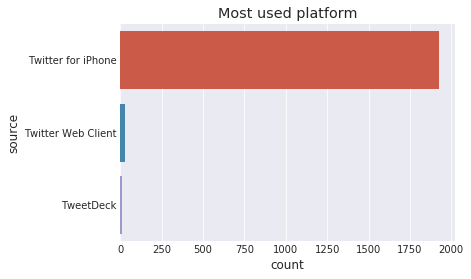

In [1144]:
sns.countplot(data=df_merged2,y='source')
plt.title('Most used platform')

The twitter mobile app on iPhones are the most frequently used to view the WeRateDogs twitter page over the peroid of time the data was collected,followed by the Web clients or browsers, with the TweetDeck tool been the least used.

### Frequency of tweets for each day of the week

Text(0,0.5,'Day of the week')

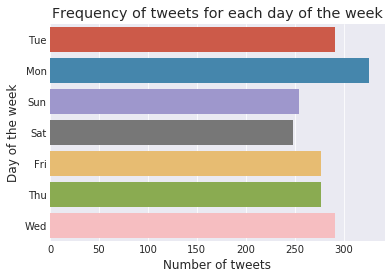

In [1145]:
sns.countplot(data=df_merged2,y='day_of_week')
plt.title('Frequency of tweets for each day of the week')
plt.xlabel('Number of tweets')
plt.ylabel('Day of the week')

Fom this visualisation ,Monday is obviously  the day where most tweets occured on the WeRateDogs over the obserered peroid.

### Line Chart of 30 day moving average for retweets and favorites.

30 day moving average showing the smoother trend lines of favorites and retweets over the period of the recored data.

In [1146]:
df_merged2['fav_moving_ave_30days']= df_merged2.favorites.rolling(window = 30).mean()
df_merged2['retw_moving_ave_30days']= df_merged2.retweets.rolling(window = 30).mean()
x1= df_merged2.timestamp

In [1147]:
df_merged2.head()

,tweet_id,timestamp,source,text_x,name,jpg_url,p1,p1_conf,p2,p2_conf,...,p3_conf,retweets,favorites,dog_stage,day_of_week,rating_numerator2,rating_denominator2,prediction,fav_moving_ave_30days,retw_moving_ave_30days
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,bagel,0.085851,...,0.076110,7322,34901,,Tue,13.0,10.0,Not likely a Dog,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,Pekinese,0.090647,...,0.068957,5468,30224,,Tue,13.0,10.0,Highly likely a Dog,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,malamute,0.078253,...,0.031379,3616,22749,,Mon,12.0,10.0,Highly likely a Dog,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,Labrador_retriever,0.168086,...,0.040836,7516,38172,,Sun,13.0,10.0,Inconclusive,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,English_springer,0.225770,...,0.175219,8074,36441,,Sat,12.0,10.0,Highly likely a Dog,NaN,NaN


### 30 day moving average showing trend of number of likes(favourites) over the period of 2015 December to August 2017

Text(0.5,0,'30 day moving average ')

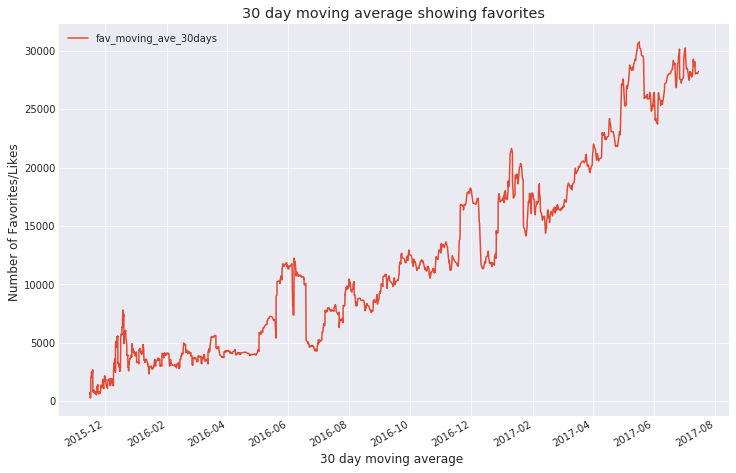

In [1148]:
df_merged2.plot.line(x='timestamp',y='fav_moving_ave_30days',figsize=(12,8))
plt.title('30 day moving average showing favorites')
plt.ylabel('Number of Favorites/Likes ')
plt.xlabel('30 day moving average ')

The line graph shows the gradual increase in likes over the period with a steady period of drops in retweets observed.

### 30 day moving average showing trend of number of retweets over the period of 2015 December to August 2017

Text(0.5,0,'30 day moving average ')

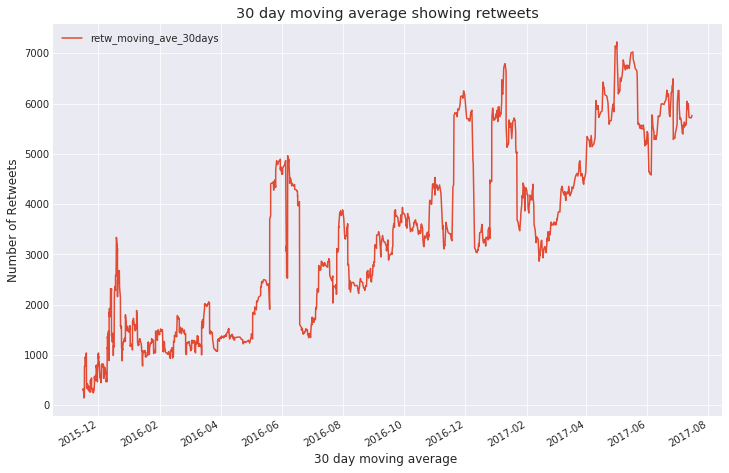

In [1149]:
df_merged2.plot.line(x='timestamp',y='retw_moving_ave_30days',figsize=(12,8))
plt.title('30 day moving average showing retweets')
plt.ylabel('Number of Retweets')
plt.xlabel('30 day moving average ')

The line graph shows the gradual increase in retweets over the period with a steady period of drops in retweets observed.

### 30 day moving average showing trend of the number of retweets and likes(favourites) over the period of 2015 December to August 2017

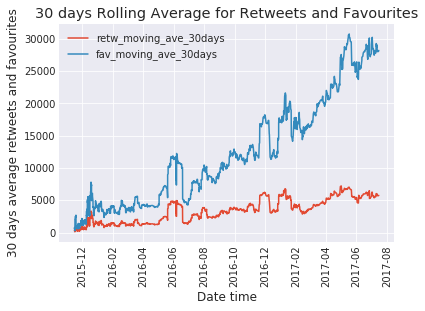

In [1150]:
y1= df_merged2.retw_moving_ave_30days
y2= df_merged2.fav_moving_ave_30days
x = df_merged2.timestamp
plt.plot(x,y1)
plt.plot(x,y2)
plt.xticks(rotation = 90)
plt.title('30 days Rolling Average for Retweets and Favourites')
plt.xlabel('Date time')
plt.ylabel('30 days average retweets and favourites')
plt.legend(loc=0);

The line graph shows the trend of gradual increase in likes(favourites) is at a higher rate than the retweets over the period, with a steady period of spikes and drops in retweets and likes matching.

### Pie Chart Percentage of Dogs at different stages

In [1151]:
df_piechart = df_merged2[df_merged2.dog_stage != '']

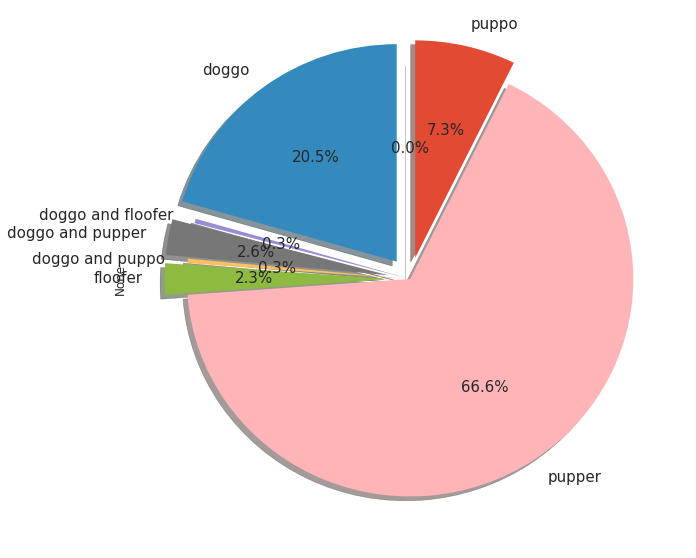

In [1152]:
explode = (0, 0.1, 0, 0.1,0,0.1,0,0.1)
df_piechart.groupby('dog_stage').size().plot(kind='pie',figsize=(10,10),autopct="%1.1f%%",textprops={'fontsize': 15},startangle=90,shadow=True,explode=explode)

From the pie chart above ,Dogs at the pupper stage are the most commonly mentioned in tweets over the period the data covered with 66% of the known dog stage totals. 

In [1153]:
df_merged2.head()

,tweet_id,timestamp,source,text_x,name,jpg_url,p1,p1_conf,p2,p2_conf,...,p3_conf,retweets,favorites,dog_stage,day_of_week,rating_numerator2,rating_denominator2,prediction,fav_moving_ave_30days,retw_moving_ave_30days
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,bagel,0.085851,...,0.076110,7322,34901,,Tue,13.0,10.0,Not likely a Dog,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,Pekinese,0.090647,...,0.068957,5468,30224,,Tue,13.0,10.0,Highly likely a Dog,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,malamute,0.078253,...,0.031379,3616,22749,,Mon,12.0,10.0,Highly likely a Dog,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,Labrador_retriever,0.168086,...,0.040836,7516,38172,,Sun,13.0,10.0,Inconclusive,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,English_springer,0.225770,...,0.175219,8074,36441,,Sat,12.0,10.0,Highly likely a Dog,NaN,NaN


### Scatter plot of Retweets and Favourites

A scatter plot diagram showing the relatioship between retweets and favorites.

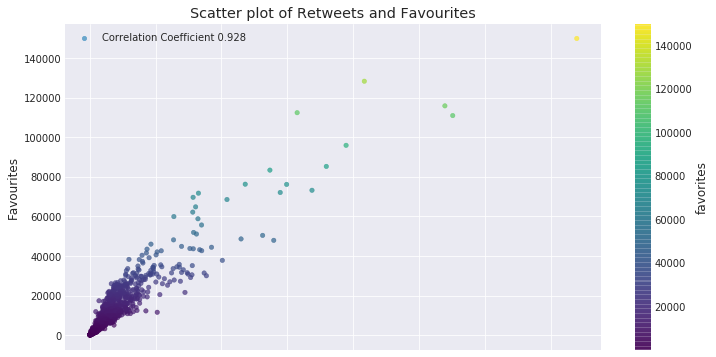

In [1154]:
corr1 = np.round(df_merged2['retweets'].corr(df_merged2['favorites']), decimals=3)


df_merged2.plot.scatter(x='retweets',y='favorites',c='favorites',colormap='viridis',label="Correlation Coefficient {}".format(corr1),figsize=(12,6),alpha=0.7)
plt.title('Scatter plot of Retweets and Favourites')
plt.xlabel('Retweets')
plt.ylabel('Favourites')
plt.legend()

.

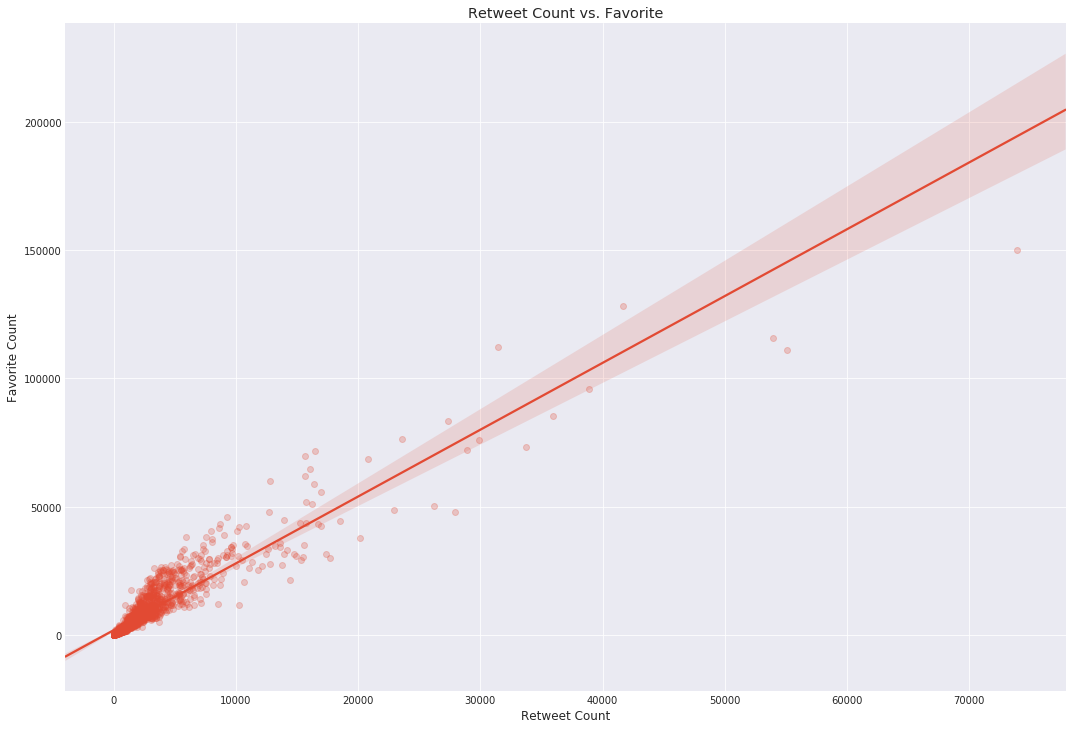

In [1155]:
sns.lmplot(x = 'retweets', y = 'favorites', data = df_merged2, size = 10, aspect = 1.5, scatter_kws={'alpha':1/4})
plt.title('Retweet Count vs. Favorite')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

From the scatter plot visualization and correlation coefficient ,the number Retweets have a positive and strong correlation with the number of Favourites

## Which dog name is the most tweeted about

In [1156]:
dog_names = df_merged2[df_merged2.name != 'Unknown']['name'].value_counts().index.tolist()

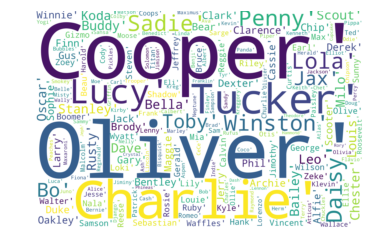

In [1157]:
wc = WordCloud(width=3000,height=2000,background_color='white',stopwords=STOPWORDS).generate(str(dog_names))
plt.figure()
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

From the word cloud diagram Copper,Charlie and Oliver are the names most frequently used as dog names in the tweets.

### Box plot showing distribution of rating for scores with a denominator of 10

In [1158]:
#Using only rating that have 10 as the denominator values to ensure the distribution result is uniform 
df_num = df_merged2[df_merged2.rating_denominator2 == 10]

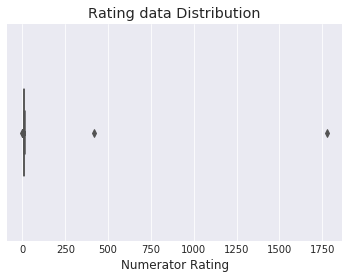

In [1159]:
data = df_num.rating_numerator2
ax = sns.boxplot(data, orient='h', width=.4)
ax.set(xlabel='Numerator Rating', title='Rating data Distribution')
plt.show()

From the boxplot diagram we can see that we have outliers ,with values greater than 350

In [1160]:
df_merged2[(df_merged2.rating_denominator2 == 10) & (df_merged2.rating_numerator2 >= 350)]

,tweet_id,timestamp,source,text_x,name,jpg_url,p1,p1_conf,p2,p2_conf,...,p3_conf,retweets,favorites,dog_stage,day_of_week,rating_numerator2,rating_denominator2,prediction,fav_moving_ave_30days,retw_moving_ave_30days
716,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af....,Atticus,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,bow_tie,0.533941,sunglasses,0.080822,...,0.050776,2370,4935,,Mon,1776.0,10.0,Not likely a Dog,5205.333333,1731.633333
1689,670842764863651840,2015-11-29 05:52:33,Twitter for iPhone,After so many requests... here you go.\n\nGood...,Unknown,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,microphone,0.096063,accordion,0.094075,...,0.061113,7916,22855,,Sun,420.0,10.0,Not likely a Dog,1871.000000,762.500000


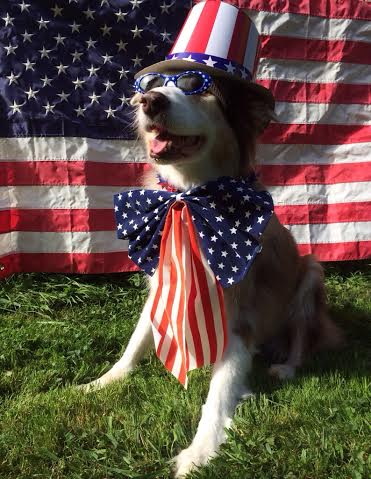

In [1161]:
url1 = 'https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg'
Disp.Image(requests.get(url1).content)

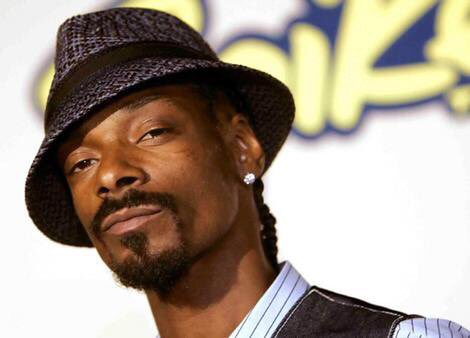

In [1162]:
url2 = 'https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg'
Disp.Image(requests.get(url2).content)

From the images, the record with a 420 rating is not a dog, but a human, the rapper "Snoop Dogg” (Calvin Cordozar Broadus Jr) but seems to be in line with the humorous nature of the tweeter page. 
Also, the picture with the highest rating of 1776 is a dog in a disguise i.e a hat,bow ties and sun glasses, with even the neural network algorithm predicting only the sun glasses and the bow tie on the dog and also interesting enough a microphone for a rapper.


### References 

- Mueller, A., 2020. Minimal Example — wordcloud 1.8.1 documentation. [online] Amueller.github.io. Available at: <https://amueller.github.io/word_cloud/auto_examples/simple.html#sphx-glr-auto-examples-simple-py> [Accessed 23 April 2021].


- Amipara, K., 2017. Better visualization of Pie charts by MatPlotLib. [online] Medium. Available at: <https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f> [Accessed 23 April 2021].

- khandelwal, p., 2021. display an image from web using IPython.display.image: sometimes work, sometimes not. [online] Stack Overflow. Available at: <https://stackoverflow.com/questions/40645782/display-an-image-from-web-using-ipython-display-image-sometimes-work-sometimes> [Accessed 23 April 2021].

- Richardson, L., 2020. Beautiful Soup Documentation — Beautiful Soup 4.9.0 documentation. [online] Crummy.com. Available at: <https://www.crummy.com/software/BeautifulSoup/bs4/doc/> [Accessed 23 April 2021].